In [1]:
import os
import sys
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from itertools import product
from collections import OrderedDict

In [2]:
# Настройка matplotlib-а
import matplotlib
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
%matplotlib inline

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

matplotlib.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
matplotlib.rcParams['legend.handletextpad'] = 0.5
matplotlib.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
matplotlib.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['axes.labelsize'] = labelsize
matplotlib.rcParams['axes.titlesize'] = titlesize

matplotlib.rc('xtick', labelsize=xticksize)
matplotlib.rc('ytick', labelsize=yticksize)
matplotlib.rc('legend', fontsize=legendsize)

matplotlib.rc('font', **{'family':'serif'})
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', unicode=True)
matplotlib.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
matplotlib.rc('text.latex', preamble=r'\usepackage[english]{babel}')
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

$\newcommand{\Sum}{\sum\limits}$
$\newcommand{\Int}{\int\limits}$
$\newcommand{\Intf}{\int\limits_{-\infty}^{+\infty}}$
$\newcommand{\Prod}{\prod\limits}$
$\newcommand{\Max}{\max\limits}$
$\newcommand{\Min}{\min\limits}$
$\newcommand{\Lim}{\lim\limits}$
$\newcommand{\Var}{\mathbb{V}}$
$\newcommand{\Exp}{\mathbb{E}}$
$\newcommand{\argmax}{\arg\max}$
$\newcommand{\Cov}{\mathrm{Cov}}$
$\newcommand{\makebold}[1]{\boldsymbol{#1}}$
$\newcommand{\mean}[1]{\overline{#1}}$
$\newcommand{\Prob}{\mathcal{P}}$
$\newcommand{\lp}{\left}$
$\newcommand{\rp}{\right}$

$\newcommand{\boldX}{\boldsymbol{X}}$
$\newcommand{\boldY}{\boldsymbol{Y}}$
$\newcommand{\boldZ}{\boldsymbol{Z}}$

$\newcommand{\Poisson}{\mathrm{Poisson}}$
$\newcommand{\Uniform}{\mathrm{Uniform}}$
$\newcommand{\Binomial}{\mathrm{Binomial}}$
$\newcommand{\Gammap}{\mathrm{Gamma}}$
$\newcommand{\Normal}{\mathcal{N}}$
$\newcommand{\LogN}{\mathrm{LogN}}$
$\newcommand{\Exponential}{\mathrm{Exp}}$
$\newcommand{\Erlang}{\mathrm{Erlang}}$
$\newcommand{\Cauchy}{C}$

<a id='toc'></a>
# Содержание
* [1. Код](#code)
    * [1.1 EmpiricalDistribution](#code_empirical)
    * [1.2 Plotters](#code_plotters)
    * [1.3 Bootstrap](#code_bootstrap)
* [2. Эмпирические функции распределения](#empirical)
    * [2.1 Примеры отрисовки](#empirical_examples)
        * [2.1.1 Нормальное распределение](#empirical_norm)
        * [2.1.2 Биномиальное распределение](#empirical_binom)
    * [2.2 Оценка эмпирической функции распределения](#empirical_est)
* [3. Бутстреп](#bootstrap)
    * [Оценки значений $\mean{\boldX_n}$ и $\mean{\boldX_n}e^{-\mean{\boldX_n}}$ для $X \sim \Poisson(\lambda)$](#seminar1_23)

<a id='code'></a>
# 1. Код [[toc]](#toc)

<a id='code_empirical'></a>
## 1.1 EmpiricalDistribution [[toc]](#toc)

In [4]:
class EmpiricalDistribution:
    """
    This class provides empirical distribution functionality. It can be used to
    - estimate empirical cdf and pdf at any points;
    - sample from the empirical distribution;
    - get point masses and cdf arrays for plotting.
    
    This implementations assumes that
    F(x) = P(X <= x) = Sum_i I[X_i <= x]
    """
    def __init__(self, samples, seed=None):
        """
        Initialize empirical distribution.
        
        Arguments:
        - samples: numpy array, list or tuple of 1D samples
        - seed:    random seed for inner generator
        """
        assert False
    def __len__(self):
        assert False
    def __str__(self):
        assert False
    def set_samples(self, samples):
        """
        (Re)set samples. Samples are sorted before being stored that takes about O(N logN) operations.
        - samples: numpy array, list or tuple of 1D samples; 
        """
        assert False
    def set_seed(self, seed):
        """
        Create an inner generator used to sample data from empirical distribution.
        """
        assert False
    
    def add_sample(self, sample):
        assert False
    def add_samples(self, samples):
        """
        Add additional samples. This operation can be quite costly, since it requires all samples to be sorted,
            that takes about O((n + m) log (n + m)) operations where n is initial number of samples and 
            m is the number of samples to add.
        
        Arguments:
        - samples: numpy array, list or tuple of 1D samples
        """
        assert False
        
    def cdf(self, x):
        """
        Returns the CDF value of the empirical distribution at the given point x.
        
        Arguments:
        - x: number; it is the value to estimate CDF at.
        
        Returns:
        - F(x): an estimated CDF value.
        """
        assert False
    
    def pdf(self, x):
        """
        Returns the PDF value of the empirical distribution at the given point x.
        
        Arguments:
        - x: number; it is the value to estimate PDF at.
        
        Returns:
        - p(x): an estimated PDF value.
        """
        assert False
    
    def sample(self, size=None, replace=True):
        """
        Take random uniform samples from inner samples.
        
        Arguments:
        - size:    the number of samples to return;
        - replace: if True, repeating samples are possible; otherwise, each sample can appear only once, 
                   but in this case one could not request more samples that empirical distribution is built upon.
        
        Returns:
        - numpy array if shape (size,) containing size samples from the stored ones.
        """
        assert False

    def get_cdf_data(self, append_borders=0):
        """
        Get data required to plot CDF. This function correctly handles repeating samples (which are typical
        in case of discrete distributions). This function caches the calculated data, so that consecutive calls
        do not require additional computations. This is true until new samples are added 
        to the empirical distribution.
        
        Arguments:
        - append_borders: nonegative number. 
            If append_borders > 0, adds border points x_left and x_right such that F(x_left) = 0, F(x_right) = 1.
            It is required for appropriate plotting since otherwise the plots do not show levels 0 and 1 of CDF. 
            The values of x_left and x_right are found as follows:
                x_left = min(samples) - append_borders * (max(samples) - min(samples))
                x_right = max(samples) +  append_borders * (max(samples) - min(samples))
            If append_boreders = 0, then does not add these additional points. In this case the lengths of 
            returned arrays are equal to the number of samples stored inside.
            
        Returns shape (points, cumulatives):
        - points: numpy array which contains stored samples (and border points if append_borders > 0) 
            in ascending order.
        - cumulatives: numpy array which contains CDF values for the returned points. 
            Attention! cumulatives[i] contains CDF value between points points[i] and points[i + 1].
            Thus, if CDF is plotted by means of plt.step(...), then "which='post'" must be used to plot 
            it correctly.
        """
        assert False
    
    def get_pdf_data(self):
        """
        Get data required to plot PDF. This function correctly handles repeating samples (which are typical
        in case of discrete distributions). This function caches the calculated data, so that consecutive calls
        do not require additional computations. This is true until new samples are added 
        to the empirical distribution.
        """
        assert False

<a id='code_plotters'></a>
## 1.2 Plotters [[toc]](#toc)

In [ ]:
def plot_empirical_pdf(x, y, ax, grid=True, color='k', border_ext=0.05,
                       xlim=None, ylim=None,
                       xlabel=None, ylabel=None, title=None, label=None,
                       arrowwidth=None, headwidth=3, headlength=5,
                       verbose=False):
    """
    Plot PDF of empirical (discrete) distribution.
    - ax:          This is the axis to plot data in.
    - grid:        If True, grid is plotted; default is True.
    - color:       Color for plotting arrows (delta-functions); default is black ('k').
    - border_ext:  Vertical and horizontal ranges will be expaned by (bordered_ext * 100)% of data ranges; 
        this parameter is not taken into account for axis X or Y if xlim or ylim are passed, respectively.
    - xlim:        Tuple (xmin, xmax); eliminates effect of border_ext.
    - ylim:        Tuple (ymin, ymax); eliminates effect of border_ext.
    - xlabel:      Lable for axis X.
    - ylabel:      Label for axis Y.
    - title:       title.
    - label:       Label to be shown in legend.
    - arrowwidth:  The absolute width of arrows used to represent delta functions of discrete PDF.
    - headwidth:   The relative width of arrows' heads; the default value is 3 absolute arrow widths.
    - headlength: 
    - verbose:     If True, prints debug information; default is False.
    """
    assert len(x) == len(y)
    x_width = np.max(x) - np.min(x) # ширина по оси X
    y_width = np.max(y)             # ширина по оси Y (минимальное значение - 0)
    if verbose:
        print('plot_point_masses: x_width = {}, y_width = {}, border_ext = {}'.format(x_width, y_width, border_ext))
    if arrowwidth is None:
        arrowwidth = 0.005 * y_width
    else:
        arrowwidth = arrowwidth * y_width
    X = x
    Y = np.zeros_like(X)
    U = np.zeros_like(X)
    V = y
    ax.quiver(X, Y, U, V, units='y', scale=1, scale_units='y', zorder=2,
              width=arrowwidth, headwidth=headwidth, headlength=headlength, color=color, label=label)
    
    x_low  = np.min(x) - border_ext * x_width
    x_high = np.max(x) + border_ext * x_width
    y_low = 0
    y_high = np.max(y) + border_ext * y_width
    # GRID
    if grid: ax.grid(which='both', linestyle='--', alpha=0.5)
    # LIMITS
    if xlim is None: xlim = (x_low, x_high)
    if ylim is None: ylim = (y_low, y_high)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    if verbose:
        print('plot_point_masses: xlim is set to ({:.2f}, {:.2f})'.format(xlim[0], xlim[1]))
        print('plot_point_masses: ylim is set to ({:.2f}, {:.2f})'.format(ylim[0], ylim[1]))
    # LABELS
    if xlabel is not None: ax.set_xlabel(xlabel)
    if ylabel is not None: ax.set_ylabel(ylabel)
    if title is not None:  ax.set_title(title)
    return ax


def plot_empirical_cdf(points, cumulatives, ax, grid=True, color='b', border_ext=0.05, 
                       xlim=None, ylim=None, xlabel=None, ylabel=None, title=None, label=None,
                       verbose=False):
    """
    Plot CDF of empirical (discrete) distribution.
    - points:      Coordinates of point masses
    - cumulatives: CDF values.
        It is assumed, that cumulatives[i] gives CDF value at intervals [points[i], points[i + 1]]
    - ax:          This is the axis to plot data in.
    - grid:        If True, grid is plotted; default is True.
    - color:       Color for plotting CDF; default is blue ('b').
    - border_ext:  Vertical and horizontal ranges will be expaned by (bordered_ext * 100)% of data ranges; 
        this parameter is not taken into account for axis X or Y if xlim or ylim are passed, respectively.
    - xlim:        Tuple (xmin, xmax); eliminates effect of border_ext.
    - ylim:        Tuple (ymin, ymax); eliminates effect of border_ext.
    - xlabel:      Lable for axis X.
    - ylabel:      Label for axis Y.
    - title:       title.
    - label:       Label to be shown in legend.
    - verbose:     If True, prints debug information; default is False.
    """
    y_low = 0; y_high = 1.0 + border_ext
    
    x_min = points[0]
    x_max = points[-1]
    x_width = x_max - x_min
    x_low  = x_min - border_ext * x_width
    x_high = x_max + border_ext * x_width

    ax.step(points, cumulatives, where='post', label=label, color=color, zorder=2)
    # GRID
    if grid: ax.grid(which='both', linestyle='--', alpha=0.5)
    # LIMITS
    if xlim is None: xlim = (x_low, x_high)
    if ylim is None: ylim = (y_low, y_high)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    if verbose:
        print('plot_point_masses: xlim is set to ({:.2f}, {:.2f})'.format(xlim[0], xlim[1]))
        print('plot_point_masses: ylim is set to ({:.2f}, {:.2f})'.format(ylim[0], ylim[1]))
    # LABELS
    if xlabel is not None: ax.set_xlabel(xlabel)
    if ylabel is not None: ax.set_ylabel(ylabel)
    if title  is not None: ax.set_title(title)
    return ax 

<a id='code_boostrap'></a>
## 1.3 Bootstrap [[toc]](#toc)

In [ ]:
class Bootstrap:
    """
    This class provides bootstrap functionality:
    - it can be used to generate bootstrap samples
    - it can be used to estimate three types of bootstrap confidence intervals
    """
    def __init__(self, samples, functional=None, seed=1):
        """
        - samples:    Numpy array, list or tuple of samples.
        - seed:       Nonnegative integer; seed to initialize inner generator used for subsampling.
        - functional: A callable entity which accepts bootstrap samples and finds required statistic.
        """
        assert False
            
    def set_seed(self, seed):
        """
        Initializes inner generator with provided seed.
        """
        assert False
        
    def generate(self, size=None, return_samples=True):
        """
        Arguments:
        - size:            Number of samples to bootstrap; by default it is the number of stored samples.  
        - return_samples:  If True, function returns generated samples; otherwise returns nothing.
        
        Returns generated samples in numpy array of shape (size, ) if return_samples is True. 
        Otherwise returns None.
        """
        assert False
    
    def get_statistics(self):
        """
        Returns all calculated estimates in a list. It makes sense only if "functional" passed to the constructor is not None.
        """
        assert False
    
    def get_init_estimate(self):
        """
        Returns the value of statistics calculated on initial samples passed to the constructor.
        """
        assert False
    
    def get_interval(self, alpha=0.05, conf_type='normal'):
        """
        Returns 1 - alpha confidence interval of type "normal".
        
        Arguments:
        - alpha:     (1-alpha) confidence intervals.
        - conf_type: "normal", "centra", "percentile".
        """
        assert False
        
    def get_normal_interval(self, alpha):
        # Нормальная оценка
        assert False
    
    def get_central_interval(self, alpha):
        # Центральный интервал
        assert False
    
    def get_percentile_interval(self, alpha):
        # Интервал на основе процентилей
        assert False
    
    
def get_all_bootstrap_intervals(bootstrap, alpha):
    """
    Given Bootstrap object this function aggregates all bootstrap confendence intervals into a dict object.
    """
    data = OrderedDict()
    data['alpha'] = alpha
    data['estimate'] = bootstrap.get_init_estimate()
    data['normal'] = bootstrap.get_normal_interval(alpha)
    data['central'] = bootstrap.get_central_interval(alpha)
    data['percentile'] = bootstrap.get_percentile_interval(alpha)
    return data

def plot_confidence_intervals(data, ax, grid=True, legend=True, ylabel=None, title=None):
    assert False

<a id='empirical'></a>
# 2. Эмпирические функция и плотность распределения [[toc]](#toc)

<a id='empirical_examples'></a>
## 2.1 Примеры отрисовки [[toc]](#toc)

<a id='empirical_norm'></a>
### 2.1.1 Нормальное распределение [[toc]](#toc)

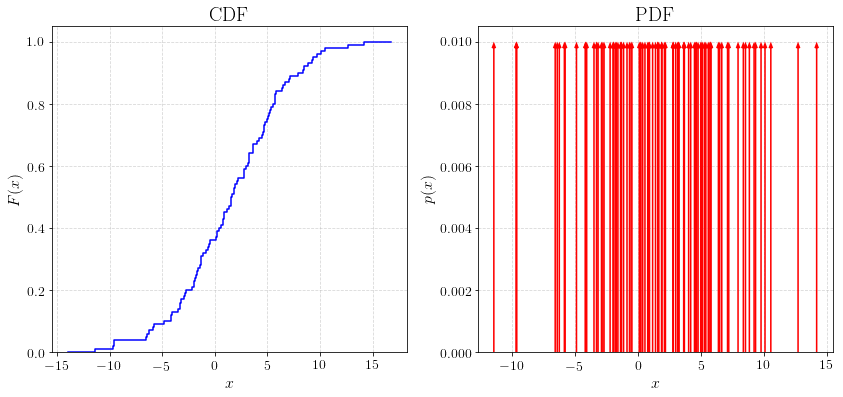

In [6]:
gen = scipy.stats.norm(loc=1, scale=5)
samples = gen.rvs(size=100, random_state=6)
edist = EmpiricalDistribution(samples, seed=0)

figsize = (14, 6)
f, axarr = plt.subplots(1, 2, figsize=figsize)

points, cumulatives = edist.get_cdf_data(append_borders=0.1)
plot_empirical_cdf(points, cumulatives, axarr[0], xlabel='$x$', ylabel='$F(x)$', title='CDF')

points, masses = edist.get_pdf_data()
plot_empirical_pdf(points, masses, axarr[1], xlabel='$x$', ylabel='$p(x)$', title='PDF', 
                   arrowwidth=None, headwidth=3, headlength=4, color='r')

<a id='empirical_binom'></a>
### 2.1.2 Биномиальное распределение [[toc]](#toc)

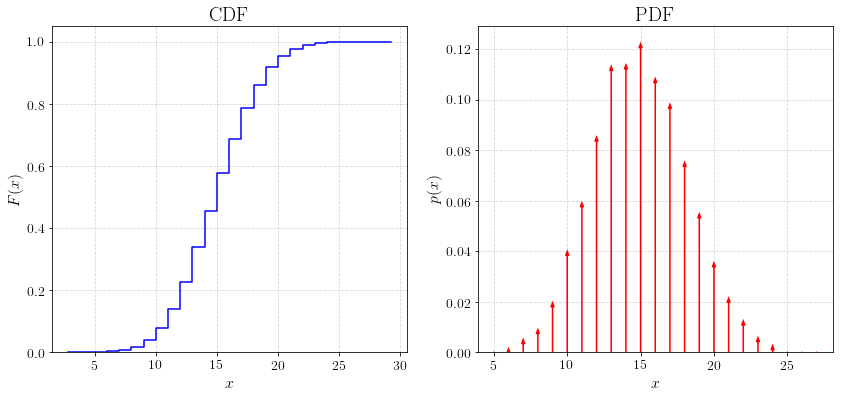

In [7]:
gen = scipy.stats.binom(n=50, p=0.3)
samples = gen.rvs(size=5000, random_state=7)
edist = EmpiricalDistribution(samples, seed=0)

figsize = (14, 6)
f, axarr = plt.subplots(1, 2, figsize=figsize)

points, cumulatives = edist.get_cdf_data(append_borders=0.1)
plot_empirical_cdf(points, cumulatives, axarr[0], xlabel='$x$', ylabel='$F(x)$', title='CDF')

points, masses = edist.get_pdf_data()
plot_empirical_pdf(points, masses, axarr[1], xlabel='$x$', ylabel='$p(x)$', title='PDF', 
                   arrowwidth=None, headwidth=3, headlength=4, color='r')

<a id='empirical_est'></a>
## 2.2 Оценка эмпирической функции распределения [[toc]](#toc)

In [8]:
class Distribution:
    def cdf(self, x):
        assert "Must be defined in derived classes."
    def pdf(self, x):
        assert "Must be defined in dervied classes."

class TriangularDistribution(Distribution):
    def __init__(self, left=0, right=2):
        self.left = left
        self.right = right
        self.mid = (left + right) / 2
        self.amplitude = 0.5 * (right - left)
        self.area = self.amplitude ** 2
    def cdf(self, x):
        if x < self.left:
            return 0.0
        if x < self.mid:
            return (0.5 * x ** 2 - self.left * x) / self.area
        if x < self.right:
            return 1 - 0.5 * (self.right - x) ** 2 / self.area
        return 1.0
    def pdf(self, x):
        if x < self.left:
            return 0.0
        if x < self.mid:
            return (x - self.left) / self.area
        if x < self.right:
            return (self.right - x) / self.area
        return 0.0

In [9]:
left = 0; right = 2
mid = 0.5 * (left + right)
true_dist = TriangularDistribution(left, right)

np.random.seed(7)
n_samples = 100 # размер выборки
samples = np.sort(np.random.uniform(left, mid, size=n_samples) + np.random.uniform(left, mid, size=n_samples))

# Бутстреп
bootstrap_size = 1000
all_bootstrap_samples = np.random.choice(samples, (bootstrap_size, n_samples), replace=True)

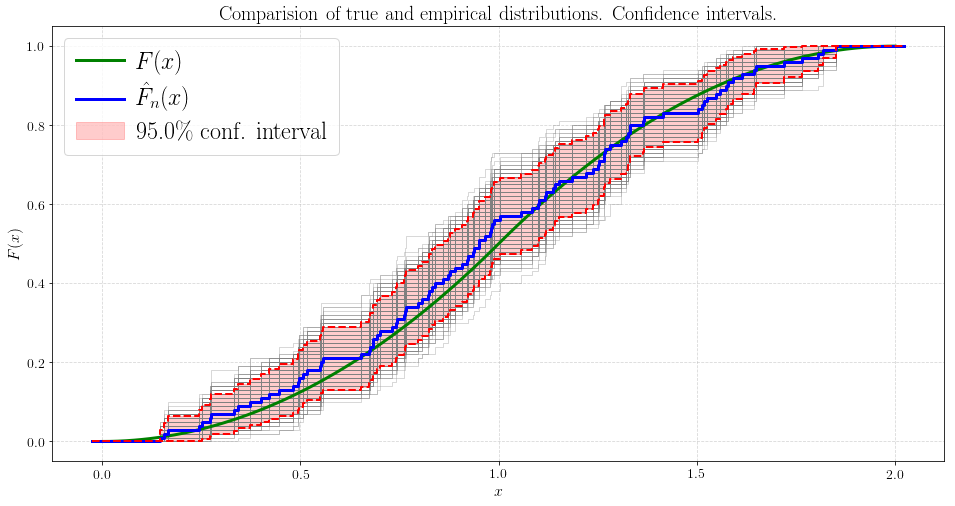

In [10]:
plt.figure(figsize = (16, 8))
matplotlib.rcParams['legend.handletextpad'] = 0.5
n_plot_points = 100
append_borders = 0.1
plot_norm_conf = True
plot_perc_conf = False


base_kwargs = {'zorder': 3}

# Истинное распределение
true_kwargs = dict(base_kwargs)
true_kwargs['color'] = 'g'
true_kwargs['linewidth'] = 3
true_kwargs['label'] = '$F(x)$'

# Бутстрепные распределения
boot_kwargs = dict(base_kwargs)
boot_kwargs['color'] = 'gray'
boot_kwargs['alpha'] = 0.3
boot_kwargs['where'] = 'post'
boot_kwargs['linewidth'] = 1

# Эмпирическое распределение
empr_kwargs = dict(base_kwargs)
empr_kwargs['color'] = 'b'
empr_kwargs['where'] = 'post'
empr_kwargs['linewidth'] = 3
empr_kwargs['label'] = '$\hat{F}_n(x)$'

# Доверительный интервал
alpha = 0.05
norm_conf_kwargs = dict(base_kwargs)
norm_conf_kwargs['color'] = 'r'
norm_conf_kwargs['linewidth'] = 2
norm_conf_kwargs['linestyle'] = '--'
norm_conf_kwargs['where'] = 'post'

perc_conf_kwargs = dict(base_kwargs)
cmap = plt.get_cmap('jet')
perc_conf_kwargs['color'] = cmap(0.1)
perc_conf_kwargs['linewidth'] = 2
perc_conf_kwargs['linestyle'] = '-.'
perc_conf_kwargs['where'] = 'post'

fill_kwargs = {}
fill_kwargs['color'] = 'r'
fill_kwargs['step'] = 'post'
fill_kwargs['alpha'] = 0.2
fill_kwargs['label'] = '{:.1f}\% conf. interval'.format((1 - alpha) * 100)
fill_kwargs['zorder'] = 2

# Построение множества бутстрепных функций распределений
for bootstrap_samples in all_bootstrap_samples:
    edist = EmpiricalDistribution(bootstrap_samples)
    points, cumulatives = edist.get_cdf_data(append_borders=append_borders)
    plt.step(points, cumulatives, **boot_kwargs)

# Построение истинного распределения
x_values = np.linspace(left, right, n_plot_points)
plt.plot(x_values, list(map(true_dist.cdf, x_values)), **true_kwargs)

# Построение эмпирического распределения и его доверительных интервалов
edist = EmpiricalDistribution(samples)
points, cumulatives = edist.get_cdf_data(append_borders=append_borders)

plt.step(points, cumulatives, **empr_kwargs)

# Нормальные доверительные интервалы
if plot_norm_conf:
    z_alpha = scipy.stats.norm.ppf(1 - alpha / 2)
    std = np.sqrt(np.maximum(cumulatives * (1 - cumulatives) / n_samples, 0.0))
    norm_upper_bound = np.minimum(cumulatives + z_alpha * std, 1)
    norm_lower_bound = np.maximum(cumulatives - z_alpha * std, 0)
    plt.step(points, norm_upper_bound, **norm_conf_kwargs)
    plt.step(points, norm_lower_bound, **norm_conf_kwargs)
    plt.fill_between(points, norm_lower_bound, norm_upper_bound, **fill_kwargs)

# Процентильные доверительные интервалы
if plot_perc_conf:
    perc_upper_bound = []
    perc_lower_bound = []
    for sample, cumulative in zip(samples, cumulatives):
        p = np.mean(samples <= sample)
        left  = scipy.stats.binom.ppf(alpha / 2, n=n_samples, p=p) / n_samples
        right = scipy.stats.binom.ppf(1 - alpha / 2, n=n_samples, p=p) / n_samples
        perc_lower_bound.append(max(left, 0.0))
        perc_upper_bound.append(min(right, 1.0))
    plt.step(samples, perc_upper_bound, **perc_conf_kwargs)
    plt.step(samples, perc_lower_bound, **perc_conf_kwargs)

plt.legend(loc='upper left', fontsize=24)
plt.xlabel('$x$'); plt.ylabel('$F(x)$')
plt.title('Comparision of true and empirical distributions. Confidence intervals.')
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.show()

<a id='bootstrap'></a>
# 3. Бутстреп. Доверительные интервалы [[toc]](#toc)

<a id='seminar1_23'></a>
## Оценки значений $\mean{\boldX_n}$ и $\mean{\boldX_n}e^{-\mean{\boldX_n}}$ для $X \sim \Poisson(\lambda)$ [[toc]](#toc)

In [11]:
mu = 0.25; random_state = 1
n_samples = 1000
alpha = 0.05

gen = scipy.stats.poisson(mu=mu)
samples = gen.rvs(size=n_samples, random_state=random_state)

true_theta_value = mu * np.exp(-mu)
def theta_function(samples):
    mean = np.mean(samples)
    return mean * np.exp(-mean)
theta_str = r'$\overline{\boldsymbol{X}_n}e^{-\overline{\boldsymbol{X}_n}}$'

"""true_theta_value = np.exp(mu)
def theta_function(samples):
    return np.exp(np.mean(samples))
theta_str = r'$e^{\overline{\boldsymbol{X}_n}}$'"""

bootstrap = Bootstrap(samples, theta_function, seed=1)
bootstrap_size = 5000
for i in range(bootstrap_size):
    bootstrap.generate(return_samples=False)

Теоретическое значение статистики: 0.194700195768
Оценка статистики на основе начальной выборки: 0.20104332002
Бутстрепная оценка статистики: 0.200985618201
Нормальный доверительный интервал:  (0.18351534804355746, 0.21857129199551389)
Центральный доверительный интервал: (0.18403022753485107, 0.21934391146330451)
Квантильный доверительный интервал: (0.18274272857576684, 0.21805641250422028)
Истинный доверительный интервал:    (0.17592745627564421, 0.21216296226993847)


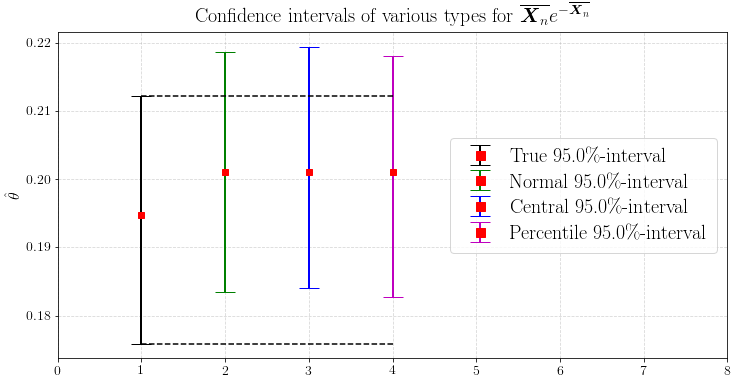

In [16]:
print('Теоретическое значение статистики:', true_theta_value)
print('Оценка статистики на основе начальной выборки:', theta_function(samples))
print('Бутстрепная оценка статистики:',      np.mean(bootstrap.get_statistics()))
print('Нормальный доверительный интервал: ', bootstrap.get_normal_interval(alpha))
print('Центральный доверительный интервал:', bootstrap.get_central_interval(alpha))
print('Квантильный доверительный интервал:', bootstrap.get_percentile_interval(alpha))

theta_gen = scipy.stats.poisson(mu=n_samples * mu)
left, right = theta_gen.interval(1 - alpha)
true_theta_left = theta_function(left / n_samples)
true_theta_right = theta_function(right / n_samples)
print('Истинный доверительный интервал:   ', (true_theta_left, true_theta_right))

f, ax = plt.subplots(1, 1, figsize=(12, 6))

conf_data = get_all_bootstrap_intervals(bootstrap, alpha)
conf_data['true'] = (true_theta_left, true_theta_right)
conf_data['true_estimate'] = true_theta_value
plot_confidence_intervals(conf_data, ax, ylabel=r'$\hat{\theta}$',
                          title=r'Confidence intervals of various types for {}'.format(theta_str))